In [27]:
import numpy as np
import pandas as pd
import math as m
import os
import matplotlib.pyplot as plt

RATIO = 4
DATASETs = ['PACIFIC1', 'ATLANTIC1', 'SOUTH_ATLANTIC1']

(7305, 1708)
(1708, 2)
-1.7733333110809326 16.158749759197235 80 26
[0, 5, 10, 15, 20, 25]
['40$\\degree$N', '45$\\degree$N', '50$\\degree$N', '55$\\degree$N', '60$\\degree$N', '65$\\degree$N']
(7305, 5238)
(5238, 2)
-1.7937499582767487 29.698124289512634 90 75
[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
['0$\\degree$', '5$\\degree$N', '10$\\degree$N', '15$\\degree$N', '20$\\degree$N', '25$\\degree$N', '30$\\degree$N', '35$\\degree$N', '40$\\degree$N', '45$\\degree$N', '50$\\degree$N', '55$\\degree$N', '60$\\degree$N', '65$\\degree$N', '70$\\degree$N', '75$\\degree$N']
(7305, 2711)
(2711, 2)
8.465624809265137 29.133333206176758 70 45
[0, 5, 10, 15, 20, 25, 30, 35, 40]
['45$\\degree$S', '40$\\degree$S', '35$\\degree$S', '30$\\degree$S', '25$\\degree$S', '20$\\degree$S', '15$\\degree$S', '10$\\degree$S', '5$\\degree$S', '0$\\degree$']


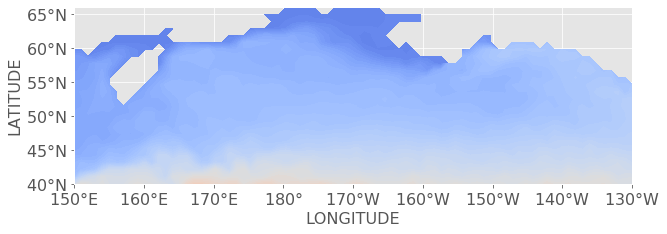

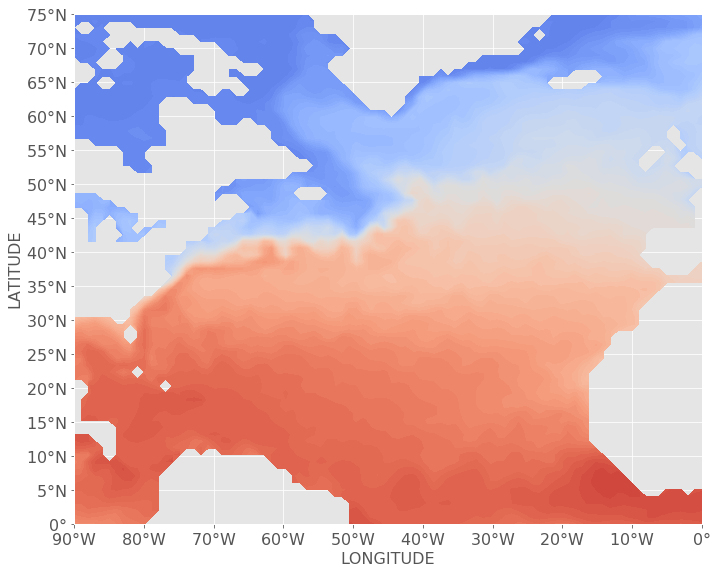

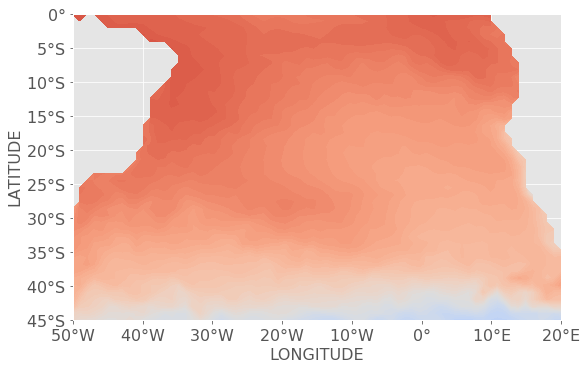

In [29]:
levels = np.linspace(-7, 33, 81)
plt.style.use('ggplot')

for DATASET in DATASETs:
    data = np.load('data/{}/{}.npz'.format(DATASET, DATASET))
    sst = data['data']
    corordinate = data['corordinate']

    print(sst.shape)
    print(corordinate.shape)

    COUNT = corordinate.shape[0]
    if DATASET[0] == 'G':
        # print(360//int(DATASET[-1]), 180//int(DATASET[-1]))
        FROM_LON, END_LON, FROM_LAT, END_LAT, SCALE = 0, 360//int(DATASET[-1]), -90//int(DATASET[-1]), 180//int(DATASET[-1])-90//int(DATASET[-1]), RATIO*int(DATASET[-1])
        NEW_LAT = END_LAT - FROM_LAT - 1
        NEW_LON = END_LON - FROM_LON
    elif DATASET[0] == 'S':
        FROM_LON_LOAD, END_LON_LOAD, NEW_LON_LOAD, FROM_LAT_LOAD, END_LAT_LOAD, NEW_LAT_LOAD, SCALE_LOAD, RATIO_LOAD = data['info']
        FROM_LON = FROM_LON_LOAD * RATIO_LOAD // SCALE_LOAD
        END_LON = END_LON_LOAD * RATIO_LOAD // SCALE_LOAD
        NEW_LON = NEW_LON_LOAD * RATIO_LOAD // SCALE_LOAD
        FROM_LAT = FROM_LAT_LOAD * RATIO_LOAD // SCALE_LOAD
        END_LAT = END_LAT_LOAD * RATIO_LOAD // SCALE_LOAD
        NEW_LAT = NEW_LAT_LOAD * RATIO_LOAD // SCALE_LOAD
        SCALE = SCALE_LOAD
    else:
        FROM_LON, END_LON, FROM_LAT, END_LAT, SCALE = data['info']
        NEW_LAT = END_LAT - FROM_LAT
        NEW_LON = END_LON - FROM_LON
    
    # print(FROM_LON, END_LON, FROM_LAT, END_LAT)
    # X, Y = np.meshgrid(np.linspace(FROM_LON*SCALE//RATIO, END_LON*SCALE//RATIO, NEW_LON), np.linspace(FROM_LAT*SCALE//RATIO, END_LAT*SCALE//RATIO, NEW_LAT))
    X, Y = np.meshgrid(np.linspace(FROM_LON*SCALE//RATIO, (END_LON+(360 if FROM_LON > END_LON else 0))*SCALE//RATIO, NEW_LON), np.linspace(FROM_LAT*SCALE//RATIO, END_LAT*SCALE//RATIO, NEW_LAT))
    Z = np.zeros((NEW_LAT,NEW_LON))
    for i in range(NEW_LAT):
        for j in range(NEW_LON):
            Z[i,j] = 1-1e10
    for i in range(COUNT):
        Z[int(corordinate[i,1]+0.2),int(corordinate[i,0]+0.2)] =sst[-1][i]

    print(sst[-1].min(),sst[-1].max(), NEW_LON, NEW_LAT)
    fig_sst = plt.figure(figsize=(NEW_LON/8, NEW_LAT/8))
    ax_sst = fig_sst.add_subplot(1,1,1)
    ax_sst.set_yticks([i for i in range(FROM_LAT, END_LAT+1, 5)])
    print([i for i in range(0, NEW_LAT, 5)])
    ax_sst.set_xticklabels([str((i%360) if i %360 < 180 else 360-(i%360))+"$\degree$"+('E' if (i%360)<180 and (i%360)>0 else ('W' if (i%360)>180 else '')) for i in range(FROM_LON*SCALE//RATIO, (END_LON+360)*SCALE//RATIO+1, 10*SCALE//RATIO)])
    ax_sst.set_yticklabels([str(i-90 if i>90 else 90-i)+"$\degree$"+('N' if i>90 else ('S' if i < 90 else '')) for i in range(FROM_LAT*SCALE//RATIO, END_LAT*SCALE//RATIO+1, 5*SCALE//RATIO)])
    print([str(i-90 if i>90 else 90-i)+"$\degree$"+('N' if i>90 else ('S' if i < 90 else '')) for i in range(FROM_LAT*SCALE//RATIO, END_LAT*SCALE//RATIO+1, 5*SCALE//RATIO)])
    # ax_sst.axis('equal')
    plt.contourf(X, Y, Z, levels=levels, cmap = plt.cm.coolwarm)
    # cb = plt.colorbar()
    # cb.set_label('SST($\degree$C)',fontsize=16) #设置colorbar的标签字体及其大小
    # cb.ax.tick_params(labelsize=16)  #设置色标刻度字体大小。
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    # for j in range(20):
    #     plt.axvline(FROM_LON+0.25*j+0.125, color = 'green', linestyle = '--', linewidth = 0.7)
    #     plt.axhline(FROM_LAT+0.25*j+0.125, color = 'green', linestyle = '--', linewidth = 0.7)
    ax_sst.set_xlabel("LONGITUDE",fontsize=16)
    ax_sst.set_ylabel("LATITUDE",fontsize=16)
    # print("---",FROM_LAT,END_LAT,FROM_LAT*SCALE//RATIO, END_LAT*SCALE//RATIO)
    # ax_sst.set_title("OCEAN",fontsize=16)
    # plt.show()
    plt.savefig('pics/{}.pdf'.format(DATASET), bbox_inches='tight')